In [34]:
# Dependencies and Setup

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

customer_data_to_load = Path("customer_segmentation_data.csv")

cs_df = pd.read_csv(customer_data_to_load)
customer_segmentation = pd.read_csv(customer_data_to_load)

cs_df.head()
# customer_segmentation.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Data Cleaning

In [35]:
# Calculate # of unique customers

number_customer = cs_df['Customer ID'].nunique()
number_customer

40259

In [36]:
# Add a column "Customer Number" in the csv file
# Every row is considered as a different customer, even having the same customer ID

counter = 0

for index, row in cs_df.iterrows():
    if pd.notna(row['Customer ID']):
        counter += 1
    cs_df.at[index, 'Customer Number'] = counter

cs_df.insert(1, 'Customer Number', cs_df.pop('Customer Number'))

# resources_folder = Path("Resources")

cs_df.to_csv("modified_customer_segmentation_1.csv", index=False)

cs_df.head()

,Customer ID,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,2.0,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


Assumption: Every row is a distinct customer because same customer ID can have different "marital status", "education level", etc.

In [37]:
# Add a column "Customer Number" in the csv file
# Every row is considered as a different customer, even having the same customer ID

counter = 0

for index, row in cs_df.iterrows():
    if pd.notna(row['Customer ID']):
        counter += 1
    customer_segmentation.at[index, 'Customer Number'] = counter

customer_segmentation.insert(1, 'Customer Number', customer_segmentation.pop('Customer Number'))

# resources_folder = Path("Resources")

customer_segmentation.to_csv("modified_customer_segmentation_2.csv", index=False)

customer_segmentation.head()

,Customer ID,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,2.0,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Relationship Comparison: Insurace Coverage vs. Income Level

In [5]:
print(cs_df.columns)

Index(['Customer ID', 'Customer Number', 'Age', 'Gender', 'Marital Status',
       'Education Level', 'Geographic Information', 'Occupation',
       'Income Level', 'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')


In [6]:
cs_df.drop(columns=['Customer ID'], inplace=True)

In [7]:
correlation = cs_df['Coverage Amount'].corr(cs_df['Income Level'])
print(f"The correlation between Insurance Coverage and Income Level is: {correlation}")

The correlation between Insurance Coverage and Income Level is: -0.01802429895116385


There is a very weak negative correlation between Insurance Coverage and Income Level in the dataset.

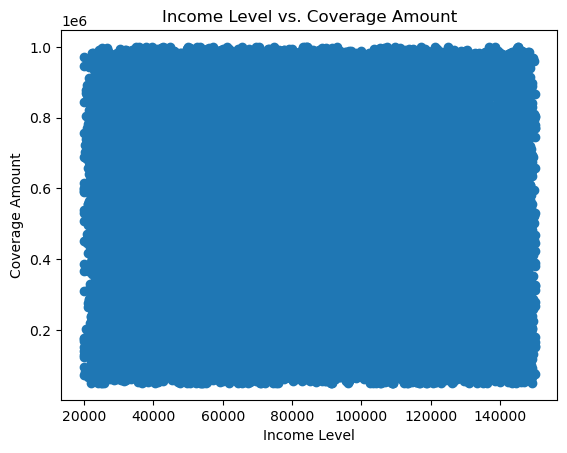

In [8]:
scatter_plot = plt.scatter(cs_df['Income Level'], cs_df['Coverage Amount'])

plt.xlabel("Income Level")
plt.ylabel("Coverage Amount")
plt.title("Income Level vs. Coverage Amount")

scatter_plot

In [9]:
# Establish the bins
income_bins = [20000, 51000, 80000, 116000, 150000]
labels = ["20000-51000", "51000-80000", "80000-116000","116000-150000"]

In [10]:
# Take the "Income Level" column, bin it according to the specified bins, assign labels to each bin, replace original column
cs_df['Income Level']=pd.cut(cs_df['Income Level'],bins=income_bins,labels=labels,include_lowest=True)
cs_df.head()

,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,51000-80000,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,2.0,26,Male,Widowed,Doctorate,Goa,Manager,51000-80000,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,51000-80000,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,51000-80000,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,20000-51000,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [11]:
# Establish the bins
coverage_bins = [200000, 480000, 740000, 1000000]
labels2 = ["200000-480000", "480000-7400000", "7400000-1000000"]

In [12]:
# Take the "Coverage Amount" column, bin it according to the specified bins, assign labels to each bin, replace original column
cs_df['Coverage Amount']=pd.cut(cs_df['Coverage Amount'],bins=coverage_bins,labels=labels2,include_lowest=True)
cs_df.head()

,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,51000-80000,policy5,04-10-2018,Phone,policy2,200000-480000,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,2.0,26,Male,Widowed,Doctorate,Goa,Manager,51000-80000,policy5,11-06-2018,Chat,policy1,7400000-1000000,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,51000-80000,policy5,06-05-2021,Email,policy3,7400000-1000000,4413,Group,Email,Mail,Evening,German,Segment3
3,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,51000-80000,policy5,09-02-2018,Chat,policy2,7400000-1000000,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,20000-51000,policy1,09-10-2018,Chat,policy4,200000-480000,1276,Family,Email,Text,Weekends,English,Segment2


In [13]:
# Calculate the "Totals" to represent the count of observations for each combination of education and income levels
income_by_education = cs_df.groupby(["Education Level", "Income Level"]).size().reset_index(name='Totals')
income_by_education

,Education Level,Income Level,Totals
0,Associate Degree,20000-51000,2900
1,Associate Degree,51000-80000,3108
2,Associate Degree,80000-116000,3105
3,Associate Degree,116000-150000,3100
4,Bachelor's Degree,20000-51000,2353
5,Bachelor's Degree,51000-80000,2342
6,Bachelor's Degree,80000-116000,2170
7,Bachelor's Degree,116000-150000,2349
8,Doctorate,20000-51000,3031
9,Doctorate,51000-80000,3147


In [14]:
# Calculate the "Totals" to represent the count of observations for each combination of coverage amount and income levels
income_by_coverage = cs_df.groupby(["Coverage Amount", "Income Level"]).size().reset_index(name='Totals')
income_by_coverage

,Coverage Amount,Income Level,Totals
0,200000-480000,20000-51000,3956
1,200000-480000,51000-80000,4111
2,200000-480000,80000-116000,4121
3,200000-480000,116000-150000,4202
4,480000-7400000,20000-51000,3377
5,480000-7400000,51000-80000,3305
6,480000-7400000,80000-116000,3368
7,480000-7400000,116000-150000,3240
8,7400000-1000000,20000-51000,3225
9,7400000-1000000,51000-80000,3540


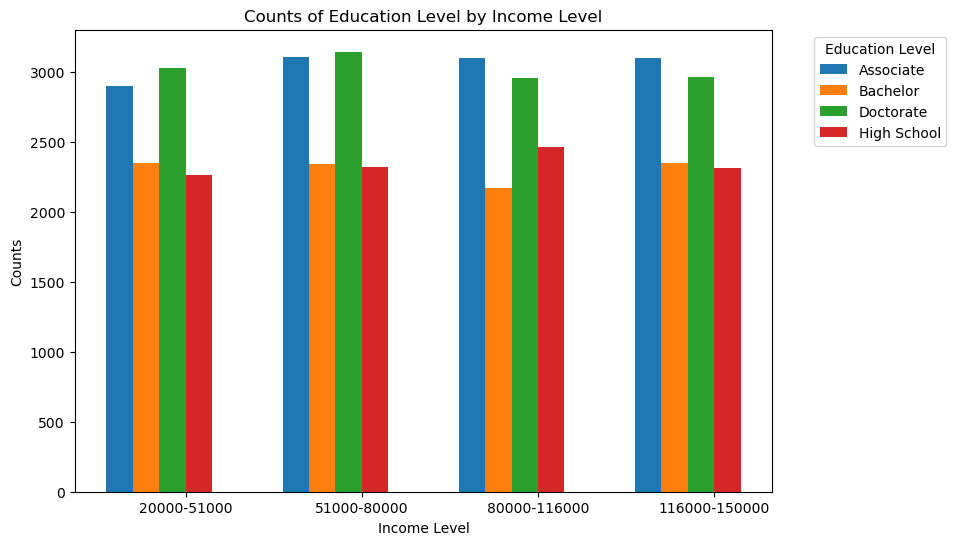

In [16]:
# Create grouped bar chart to visualize the counts of education levels by income levels

education = ["Associate", "Bachelor", "Doctorate", "High School", "Master"]
income_bin = ["20000-51000", "51000-80000", "80000-116000", "116000-150000"]
counts = [
    [2900, 3108, 3105, 3100],
    [2353,2342,2170,2349],
    [3031,3147, 2961, 2964],
    [2263,2326,2464, 2313]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (educate, data2) in enumerate(zip(education, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=educate)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts')
ax.set_title('Counts of Education Level by Income Level')
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

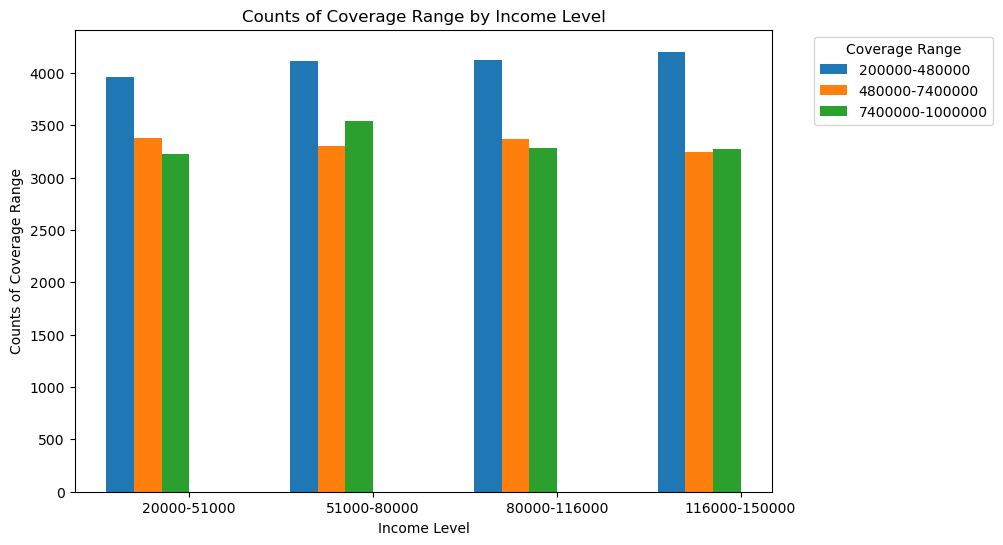

In [17]:
# Create grouped bar chart to visualize the counts of coverage ranges by income levels

coverage = ["200000-480000", "480000-7400000", "7400000-1000000"]
income_bin = ["20000-51000", "51000-80000", "80000-116000", "116000-150000"]
counts = [
    [3956, 4111,4121,4202],
    [3377,3305,3368,3240],
    [3225,3540,3287,3272]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (coverage, data2) in enumerate(zip(coverage, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=coverage)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts of Coverage Range')
ax.set_title('Counts of Coverage Range by Income Level')
ax.legend(title='Coverage Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Relationship Comparison: Occupation vs Communication Channel

In [18]:
# Group data by "Occupation" & "Preferred Communication Channel"
communication_by_occupation = cs_df.groupby(["Occupation", "Preferred Communication Channel"]).size().unstack(fill_value=0)
communication_by_occupation

Preferred Communication Channel,Email,In-Person Meeting,Mail,Phone,Text
Occupation,,,,,
Artist,882,1411,1070,1488,815
Doctor,931,1638,1104,1152,748
Engineer,1063,1418,1187,1078,958
Entrepreneur,1233,1761,1235,1539,868
Lawyer,1010,1425,1184,1296,860
Manager,900,1743,1159,1126,875
Nurse,703,1190,880,1119,629
Salesperson,1108,2246,1474,1811,1280
Teacher,973,1479,1136,1263,1055


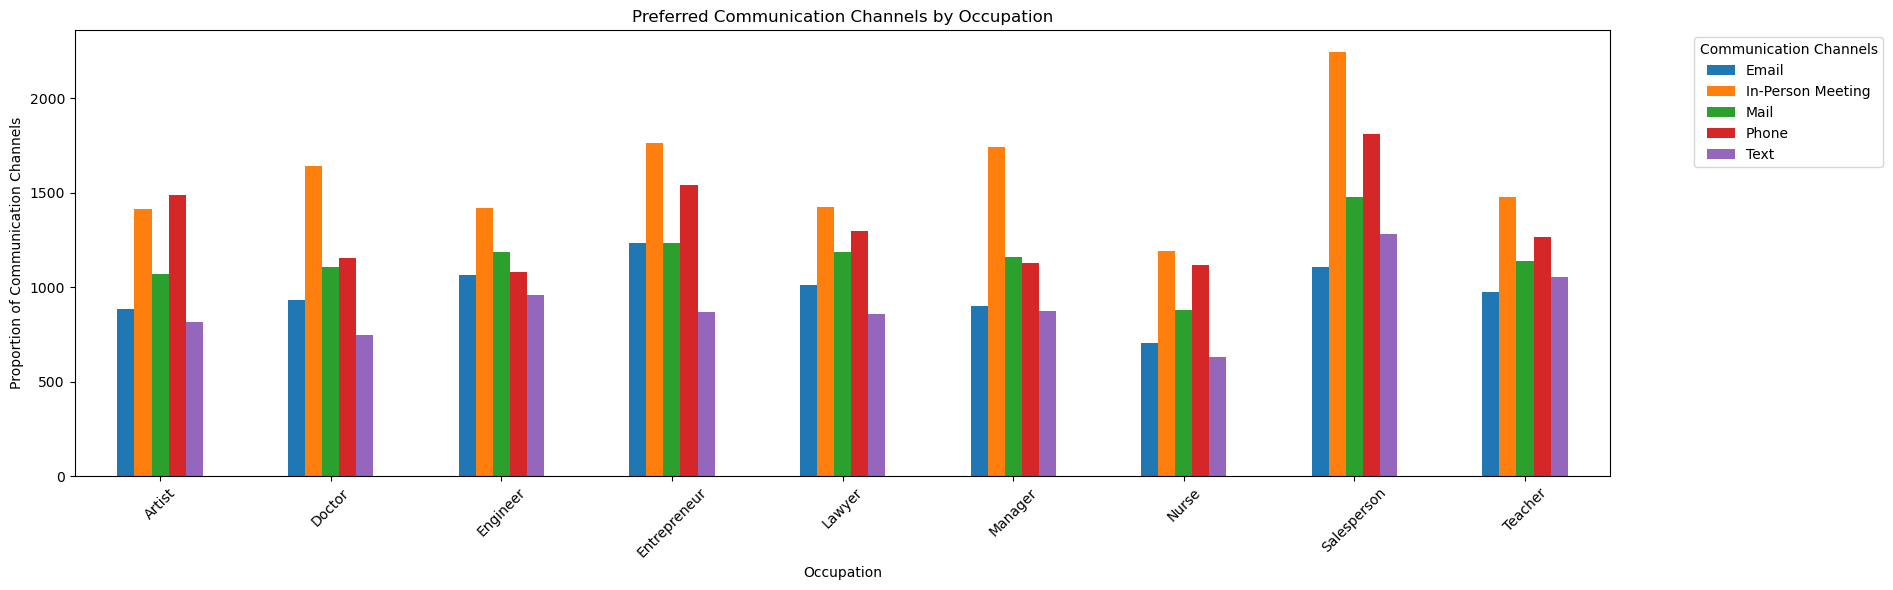

In [19]:
# Visualize relationship between "Occupation" & "Preferred Communication Channel"

fig, ax = plt.subplots(figsize=(19, 6))

communication_by_occupation.plot(kind='bar', ax=ax) # stacked=True
plt.title('Preferred Communication Channels by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Communication Channels')
plt.xticks(rotation=45)
plt.legend(title='Communication Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
# Correlation Analysis between Occupation and Preferred Communication Channel
# Chi-square test for independence
cross_tab_communication = pd.crosstab(cs_df['Occupation'], cs_df['Preferred Communication Channel'])
chi2_communication, p_communication, _, _ = chi2_contingency(cross_tab_communication)
print("Chi-square test results for communication channels:")
print(f"Chi-square statistic: {chi2_communication}")
print(f"P-value: {p_communication}")

Chi-square test results for communication channels:
Chi-square statistic: 366.17317802763915
P-value: 2.222025091627914e-58


In [21]:
# Group data by "Occupation" & "Preferred Contact Time"

contact_time_by_occupation = cs_df.groupby(["Occupation", "Preferred Contact Time"]).size().unstack(fill_value=0)
contact_time_by_occupation

Preferred Contact Time,Afternoon,Anytime,Evening,Morning,Weekends
Occupation,,,,,
Artist,982,813,987,1510,1374
Doctor,901,749,1059,1343,1521
Engineer,1012,720,901,1495,1576
Entrepreneur,1193,930,1200,1692,1621
Lawyer,957,817,988,1484,1529
Manager,915,701,1033,1418,1736
Nurse,776,625,880,1192,1048
Salesperson,1355,982,1248,2058,2276
Teacher,1044,763,1112,1576,1411


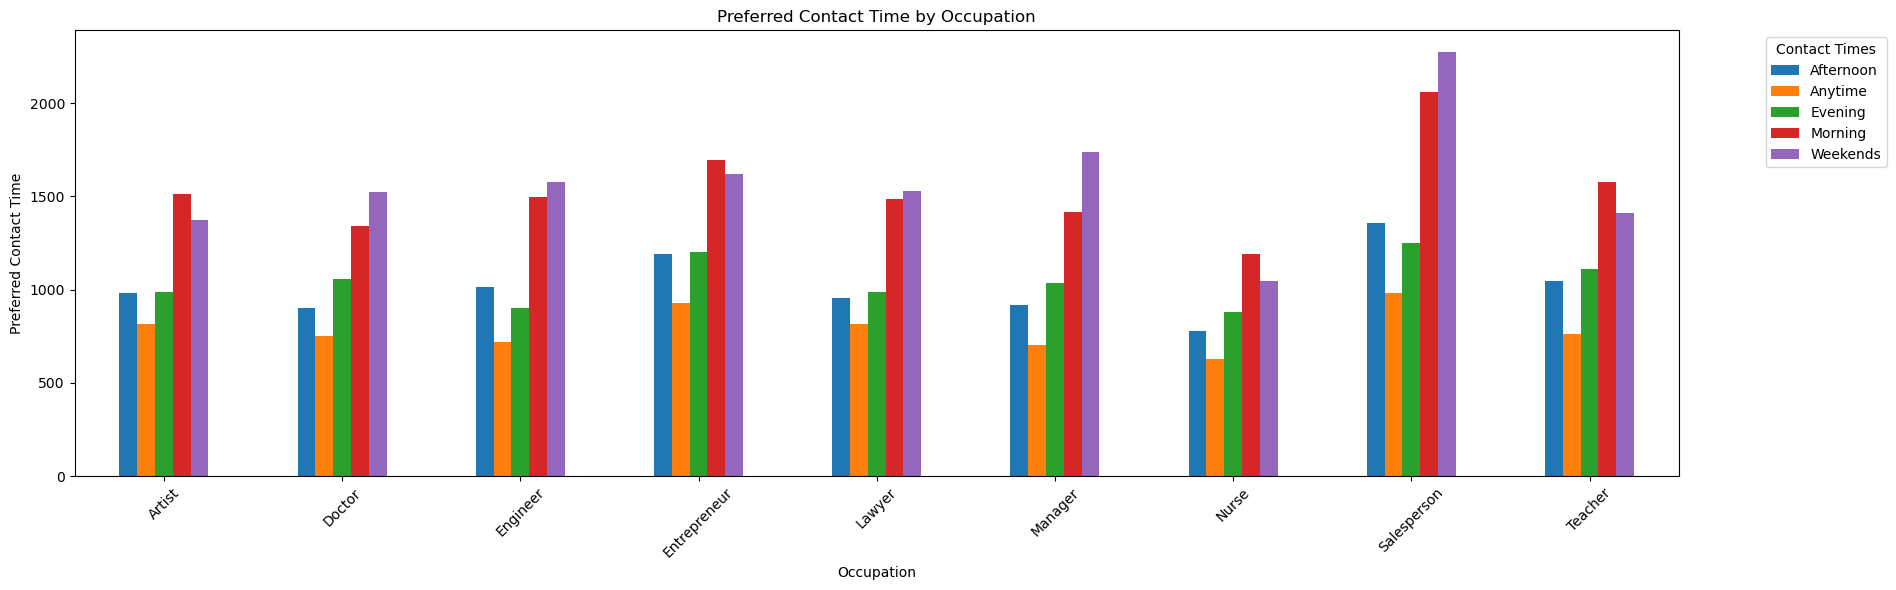

In [22]:
# Visualize relationship between "Occupation" & "Preferred Contact Time"

fig, ax = plt.subplots(figsize=(19, 6))

contact_time_by_occupation.plot(kind='bar', ax=ax)
plt.title('Preferred Contact Time by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Preferred Contact Time')
plt.xticks(rotation=45)
plt.legend(title='Contact Times', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relationship Comparison: Premium Coverage Amount vs. Age

In [23]:
# Establish the Age bins
age_bins = [0, 25, 40, 55, 70]
bins_labels = ["<25", "25-40","40-55", "55-70"]
customer_segmentation_df_copy = cs_df.copy()
customer_segmentation_df_copy["Age Range"] = pd.cut (x = customer_segmentation_df_copy["Age"], bins = age_bins, labels = bins_labels, include_lowest=True)

familypolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Family', ['Age Range', 'Premium Amount']]
avg_premium_by_age_familypolicy = familypolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_familypolicy.name = "Avg_Premium_Family"

businesspolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Business', ['Age Range', 'Premium Amount']]
avg_premium_by_age_businesspolicy = businesspolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_businesspolicy.name = "Avg_Premium_Business"

grouppolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Group', ['Age Range', 'Premium Amount']]
avg_premium_by_age_grouppolicy = grouppolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_grouppolicy.name = "Avg_Premium_Group"

individualpolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Individual', ['Age Range', 'Premium Amount']]
avg_premium_by_age_individualpolicy = individualpolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_individualpolicy.name = "Avg_Premium_Individual"

avg_premium_by_age_df = pd.merge (avg_premium_by_age_familypolicy, avg_premium_by_age_businesspolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_grouppolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_individualpolicy, how = "left", on = ["Age Range"])

avg_premium_by_age_df

,Avg_Premium_Family,Avg_Premium_Business,Avg_Premium_Group,Avg_Premium_Individual
Age Range,,,,
<25,2985.098990,3031.422367,3032.702529,3027.172735
25-40,2967.640714,3042.021329,3069.066564,3021.361734
40-55,2939.774023,2987.931937,3015.364277,3025.240924
55-70,2973.495512,3080.780800,3054.264816,3084.010950


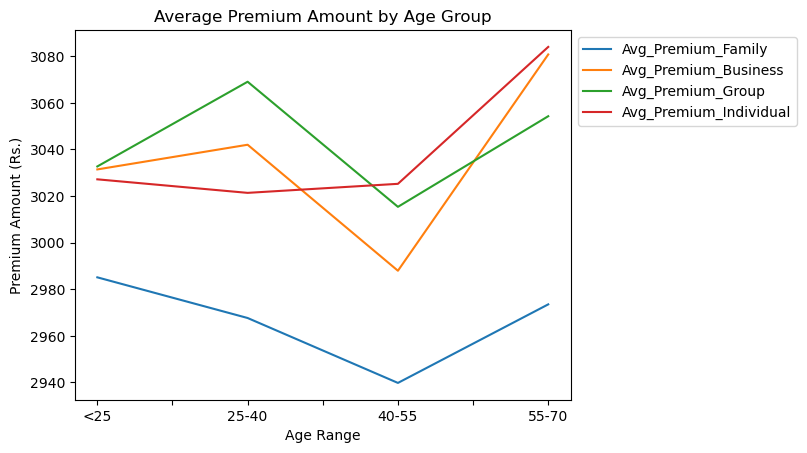

In [24]:
# Plot a line chart to visualize the average premium amount by age group

avg_premium_by_age_plot = avg_premium_by_age_df.plot.line ()
avg_premium_by_age_plot.set_ylabel ("Premium Amount (Rs.)")
avg_premium_by_age_plot.set_title ("Average Premium Amount by Age Group")
avg_premium_by_age_plot.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Relationship Comparison: Marital Status vs. Policy type

In [25]:
# Calculate the "Totals" to represent the count of observations for each combination of Marital Status and Policy Type
policy_by_marital = cs_df.groupby(["Marital Status", "Policy Type"]).size().reset_index(name='Totals')
policy_by_marital

,Marital Status,Policy Type,Totals
0,Divorced,Business,3352
1,Divorced,Family,2918
2,Divorced,Group,4651
3,Divorced,Individual,2230
4,Married,Business,3536
5,Married,Family,3071
6,Married,Group,4558
7,Married,Individual,2054
8,Separated,Business,2482
9,Separated,Family,2095


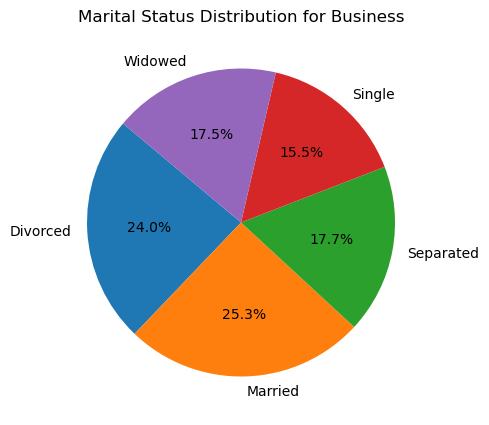

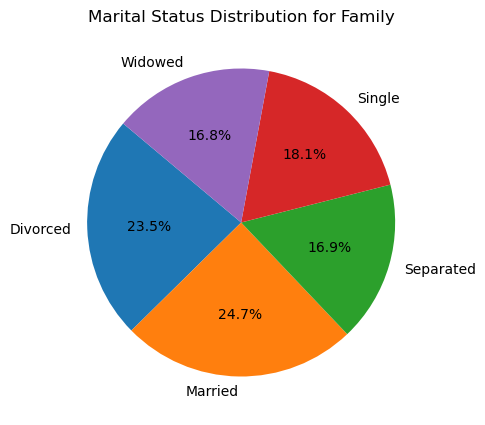

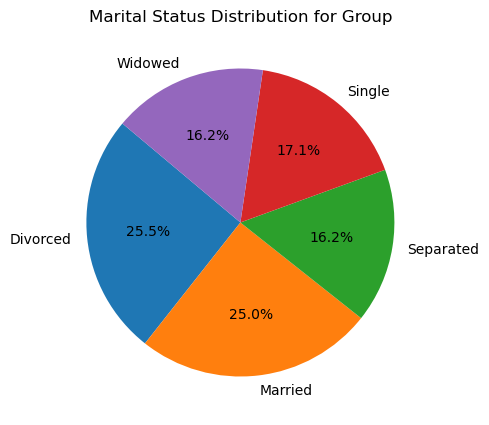

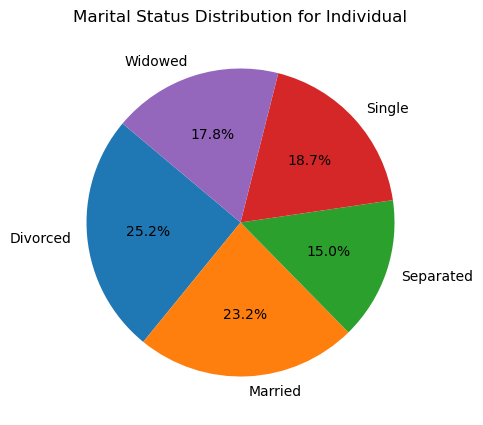

In [26]:
#create a pivot for policy type by marital status
pies_by_policy = policy_by_marital.pivot(columns="Marital Status", index="Policy Type", values="Totals")
#use this pivot and divide by policy type, make a something a pie can be made of with the pie being policy type and slices marital status
pies_by_policy = pies_by_policy.div(pies_by_policy.sum(axis=1), axis=0)
for policy_type, data in pies_by_policy.iterrows():
    plt.figure(figsize=(7, 5))
    plt.pie(data, labels=data.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Marital Status Distribution for {policy_type}")
    plt.show()

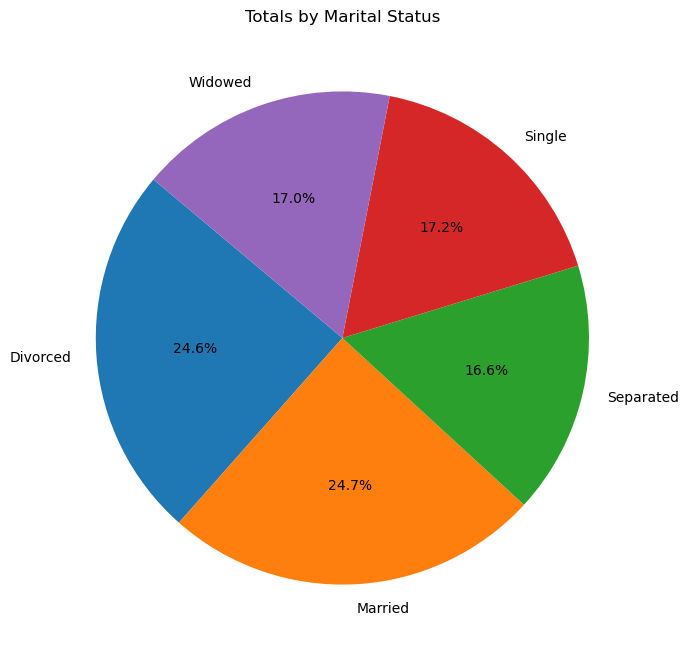

In [27]:
totals_by_marital = policy_by_marital.groupby("Marital Status")["Totals"].sum()
# Display the resulting DataFrame
totals_by_marital
plt.figure(figsize=(7, 8))
plt.pie(totals_by_marital, labels=totals_by_marital.index, autopct="%1.1f%%", startangle=140)
plt.title("Totals by Marital Status")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [28]:
Customer_Num = customer_segmentation[['Customer Number', 'Age', 'Coverage Amount']]
Customer_Num.head()

,Customer Number,Age,Coverage Amount
0,1.0,23,366603
1,2.0,26,780236
2,3.0,29,773926
3,4.0,20,787815
4,5.0,25,366506


In [29]:
# Establish the bins
age_bracket = [0, 20, 40, 60, 80]
labels = ["<20", "20-40", "40-60", "60-80"]

In [33]:
# Convert "Age" column to float dtype
Customer_Num["Age"] = Customer_Num["Age"].astype(float)

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
Customer_Num = Customer_Num.copy()

# Use .loc to set values on the copied DataFrame
Customer_Num.loc[:, "Coverage Range by Customer #"] = pd.cut(Customer_Num["Age"], bins=age_bracket, labels=labels, include_lowest=True)

Customer_Num.head()

,Customer Number,Age,Coverage Amount,Coverage Range by Customer #
0,1.0,23.0,366603,20-40
1,2.0,26.0,780236,20-40
2,3.0,29.0,773926,20-40
3,4.0,20.0,787815,<20
4,5.0,25.0,366506,20-40


In [31]:
# Convert "Coverage Amount" column to numeric dtype
Customer_Num["Coverage Amount"] = pd.to_numeric(Customer_Num["Coverage Amount"], errors='coerce')

# Group by "Coverage Range by Customer #" and calculate the mean of numeric values in "Coverage Amount" column
age_bracket_coverage = Customer_Num.groupby("Coverage Range by Customer #").agg({'Coverage Amount': ['mean', 'median', 'var', 'std', 'sem']})

age_bracket_coverage


Coverage Amount                          \
                                        mean    median           var   
Coverage Range by Customer #                                           
<20                            493848.635833  483784.5  7.041543e+10   
20-40                          490832.704803  473812.0  7.210560e+10   
40-60                          492716.769343  479573.5  7.213850e+10   
60-80                          495705.711871  480165.0  7.205657e+10   

                                                          
                                        std          sem  
Coverage Range by Customer #                              
<20                           265359.066831  5855.091841  
20-40                         268524.856525  1803.236456  
40-60                         268586.112508  1974.257552  
60-80                         268433.548298  2587.078486

In [32]:
# Perform the ANOVA

f_statistic, p_value = stats.f_oneway(
    Customer_Num.loc[Customer_Num['Coverage Range by Customer #'] == '<20', "Coverage Amount"],
    Customer_Num.loc[Customer_Num['Coverage Range by Customer #'] == '20-40', "Coverage Amount"],
    Customer_Num.loc[Customer_Num['Coverage Range by Customer #'] == '40-60', "Coverage Amount"],
    Customer_Num.loc[Customer_Num['Coverage Range by Customer #'] == '60-80', "Coverage Amount"]
)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.8168250444648897
p-value: 0.4843139488122149


Null Hypothesis: There is no difference in the average coverage amount between different age groups
Alternative Hypothesis: There is a difference in the average coverage amount between different age groups

p-value: 0.48 with confidence interval level of 0.05

Conclusion: Fail to reject the null hypothesis. There is insufficient evidence to reject the null hypothesis. There is no statistically signficant difference in the average coverage amount across different age groups